<center><font size=8>Hands-on - Retrieval-Augmented Generation (RAG)</font></center>

# **Problem Definition**

As organizations grow and scale, they are often inundated with large volumes of data, reports, and documents that contain critical information for decision-making. In real-world business settings, such as venture capital firms like Andreessen Horowitz, business analysts are required to sift through large datasets, research papers, or reports to extract relevant information that impacts strategic decisions.

For instance, consider that you've just joined Andreesen Horowitz, a renowned venture capital firm, and you are tasked with analyzing an Article like Nasscom's "Large Language Models(LLMs)- A backgrounder" Going through the report manually can be extremely time-consuming as the size and complexity of these report increases. However, by using Semantic Search and Retrieval-Augmented Generation (RAG) models, you can significantly streamline this process.


# **Installing Libraries**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28  --force-reinstall --upgrade --no-cache-dir -q 2>/dev/null

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is NOT being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 51.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 189.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.6 MB/s eta 0:00:00


In [ ]:
# For installing the libraries & downloading models from HF Hub
!pip install -q tiktoken==0.6.0 \
                pypdf==4.0.1 \
                langchain==0.1.1 \
                langchain-community==0.0.13 \
                chromadb==0.4.22 \
                sentence-transformers==2.3.1 \
                huggingface_hub==0.23.2 \
                numpy==1.25.2 2>/dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 49.0 MB/

In [ ]:
import json
import tiktoken

import pandas as pd

from langchain.text_splitter import RecursiveCharacterTextSplitter

from langchain_community.document_loaders import PyPDFDirectoryLoader, PyPDFLoader
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings
)
from langchain_community.vectorstores import Chroma

from google.colab import userdata, drive

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Loading the data**

In [ ]:
pdf_file = "Deloitte LLM Article.pdf"

In [ ]:
pdf_loader = PyPDFLoader(pdf_file);

Here we have used the `PyPDFLoader` because we are working with a single document. Suppose we were dealing with multiple documents in various files within a folder. In that case, we would use the `PyPDFDirectorLoader` to point to this folder. It would then load each file, break it into chunks, and store these chunks in a list. This process involves looping over each file in the directory, chunking the file, and storing the chunks.


# **Retrieval Augmented Generation (RAG) Overview**

The figure below depicts the key stages involved in designing a RAG solution using LLMs. Let us look at each stage in detail.

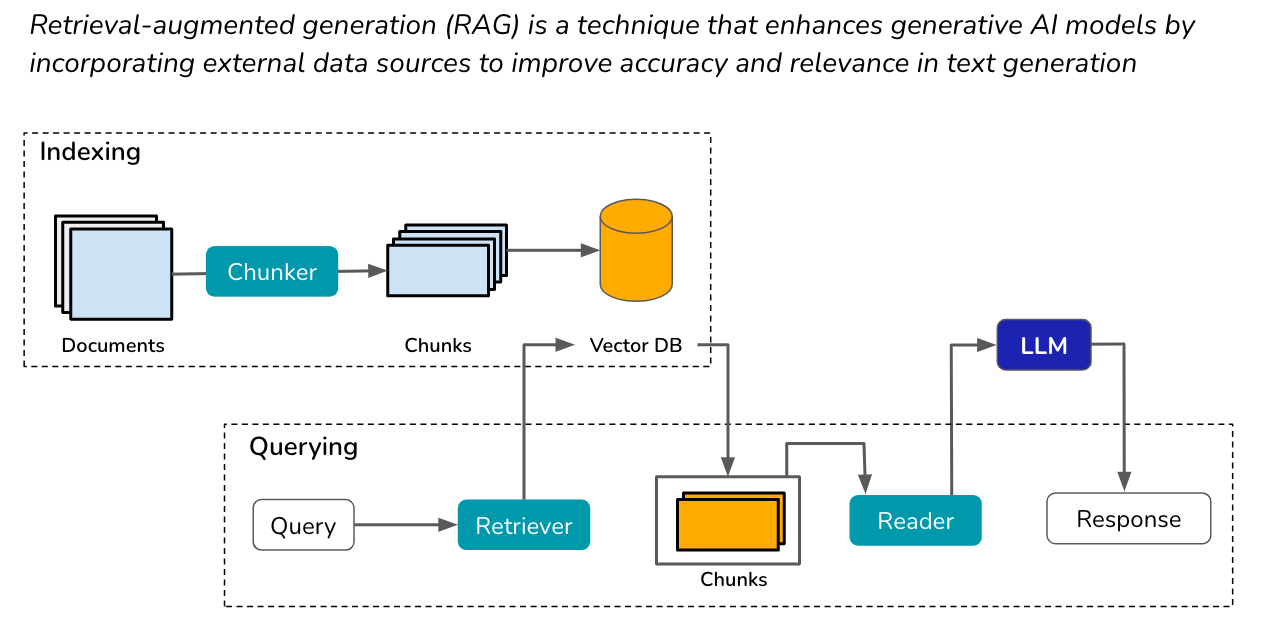

# **Implementing RAG**

## **Retriever**

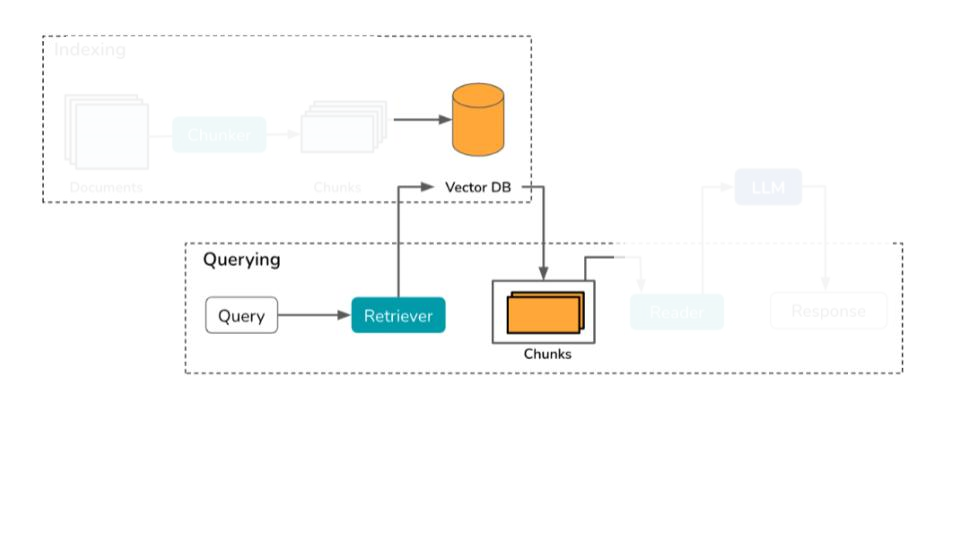

In **Retrieval-Augmented Generation (RAG)**, the **retriever** component is responsible for fetching relevant documents or context from a knowledge base to enhance the model's generation. Here are the key steps involved in the **retriever part**:

1. **Chunking**:  
   - Split large documents into smaller, manageable chunks while maintaining context (e.g., using `RecursiveCharacterTextSplitter`).

2. **Embedding Generation**:  
   - Convert each text chunk into a **vector embedding** using a pre-trained embedding model.

3. **Vector Storage**:  
   - Store the embeddings in a **vector database** (e.g., Chroma, Pinecone, or FAISS) for efficient similarity search.

4. **Similarity Search**:  
   - Perform a **similarity search** in the vector store to find the most relevant document chunks based on the query embedding.

### Chunking documents

**Slicing the data into chunks facilitates fine-grained control of the specific information that can be injected as context.** This helps the model to focus only on the information most relevant to a query provided by a user. We will transform the PDF file into chunks of text that are no more than 512 tokens long. This is due to a common chunking strategy which uses a fixed-size chunk as defined by the embedding model and uses a small overlap between the chunks (see figure below).

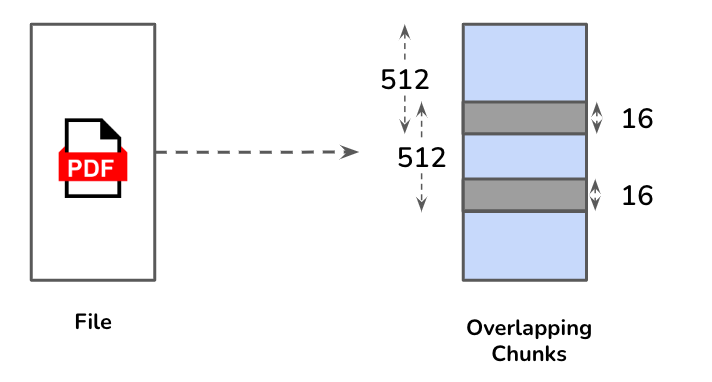

Using an overlap allows for continuity between chunks and retrieval of relevant chunks even when the information relevant to the query is present either at the beginning of the chunk or the end of the chunk.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512,
    chunk_overlap=16
)

The given code initializes a **RecursiveCharacterTextSplitter** to split the text into manageable chunks for embedding and retrieval. Here's a breakdown:

- `RecursiveCharacterTextSplitter.from_tiktoken_encoder(...)`: Uses **TikToken encoding** to properly handle token-based splitting.
- `encoding_name='cl100k_base'`: Specifies the **TikToken encoding** (used by OpenAI models like GPT-4 and GPT-3.5).
- `chunk_size=512`: Each text chunk will have a maximum of **512 tokens**.
- `chunk_overlap=16`: Ensures **overlapping** of 16 tokens between consecutive chunks to preserve context.

This approach ensures that text is split **intelligently** while maintaining **semantic meaning** for better retrieval and embeddings.

In [ ]:
document_chunks = pdf_loader.load_and_split(text_splitter)

(Note: Expect that the above cell will take time to execute).

Let's take a look at consecutive chunks from the document.

In [ ]:
i = 5
document_chunks[i]

Document(page_content="3 | P a g e  \nare hosted on cloud platforms and can be used \nfor various NLP tasks such as text generation, \ntranslation, summarization, and more. Some of \nthe leading examples include OpenAI's GPT \nmodels, Google's PaLM (Path Language \nModel), Meta’s LLaMA, and NVIDIA's NeM o TM. \nThese models have gained popularity due to \ntheir versatility and ease of integration into \nvarious applications. They have the advantage \nof being continuously updated and improved by \nthe developers, which helps ensure they \nremain state -of-the-art in t erms of performance.  \nThe use of these models allows for their \ncontinuous training.  \nb. Private LLMs  \nPrivate LLMs are models that are customized \nor tuned for specific tasks or industries,  or \norganizations and are operated within a private \ncloud or an in -house infrastructure. These \nmodels could be either purpose -built from \nscratch or fine -tuned versions of publicly \navailable models. The primary aim

In [ ]:
document_chunks[i+1]

Document(page_content='have more control over their AI initiatives.  \nFalcon40B  and its scaled -up version “Falcon \n180B ” by the UAE is a notable example  of an \nopen source LLM where  recent \nannouncements made it free of royalties for \ncommercial and research use  [2]. \nComparison of Contemporary LLMs  \nNumerous Large Language Models (LLMs) have \nbeen released, including prominent ones like \nOpenAI ’s GPT -4, Google ’s PaLM2, and Meta ’s \nLlaMA. These models differ based on their \nfundamental architecture, the data they were \ntrained on, applied model parameters, and any \nspecialized tuning for particular uses. Additionally,  \ndevelopment costs and budget also play a role in \nshaping the performance of generative AI systems \nwhen responding to users’  queries\n \nNotable Large Language Models  [3] [7]:  \nCompany  Model  Launch Year  # Parameters  in billions  #GPUs & Training Time  \nOpen AI  GPT 3 .5 2022  175 10k V100 GPUs/ 3500 A100 \nrunning for 240 Hours  \nGP

As we can see there is some overlap between the chunks. This improves the coherence and relevance of retrieved results, as the model can better understand the relationship between adjacent parts of the document. It also helps in maintaining the flow of ideas and ensuring that critical context is available when generating answers, leading to more accurate and contextually consistent outputs.


### Choosing an embedding model

Let us first recap what embeddings are:

- Embeddings are a type of word representation that allows words with similar meaning to have a similar representation.
- They capture semantic properties of words and relations with other words.


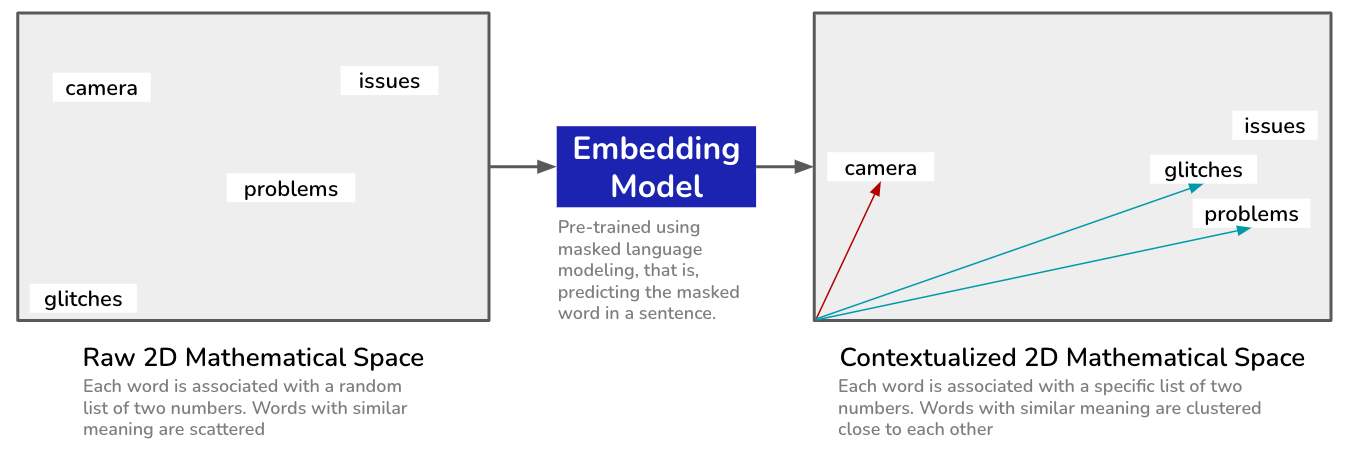

Similar to word embedding models, sentence embedding models represent the meaning of whole sentences. They are derived by averaging word embeddings or using specialized embedding models.

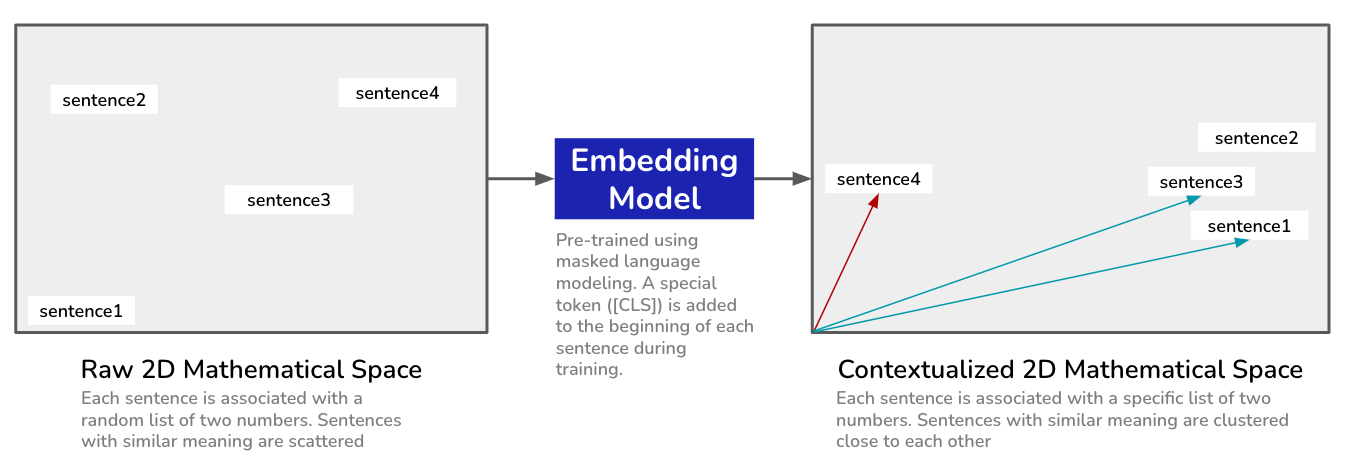

Good embedding models encode text into vector representations that act as good features for the downstream LLM tasks (e.g., in this case, retrieval). However, there are many embedding models to choose from (both free and paid) and the choice is not often straightforward. Moreover, there is no evidence that free/open-source embedding models (e.g., models hosted on HuggingFace) are less effective compared to paid models (e.g., from Open AI).

A good method to choose an embedding model is to use the [embedding leaderboard](https://huggingface.co/spaces/mteb/leaderboard) and select an open-source model that is performant for the use case at hand.

**Note**: The snapshot below is for illustration purposes. The leaderboard is expected to update whenever newer models are added and/or when the existing models are updated.


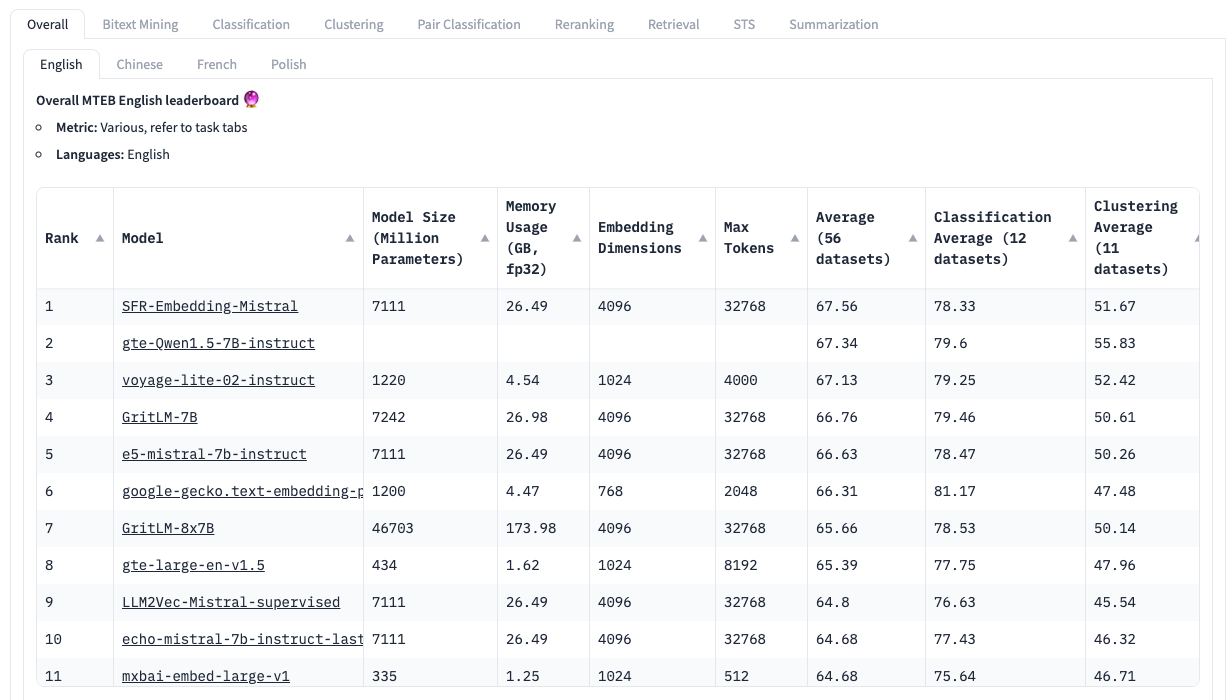

A good general-purpose embedding model is [`gte-large`](https://huggingface.co/thenlper/gte-large). The main reason for choosing this model is because of its embedding vector size, which is 512, the same as our token size in chunking.

In [ ]:
embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Now that we have chunked the raw input, **we can present these chunks to an embedding model and then store the generated embeddings into a vector database.**
  - We generate a vector for each chunk and save this chunk along with the vector representation in a specialized database.

### Creating a Vector Database

A **vector database** is a specialized database designed to store, manage, and retrieve **high-dimensional vector embeddings** efficiently. These embeddings, generated from text, images, or other data types, capture semantic similarities, enabling applications like **semantic search, recommendation systems, and Retrieval-Augmented Generation (RAG)**.

To improve search speed and efficiency, vector databases employ **indexing techniques**. These indexing methods allow the database to **quickly retrieve relevant vectors** without scanning the entire dataset, making searches significantly faster, even at scale making them crucial for AI-driven applications like **RAG-based systems**.

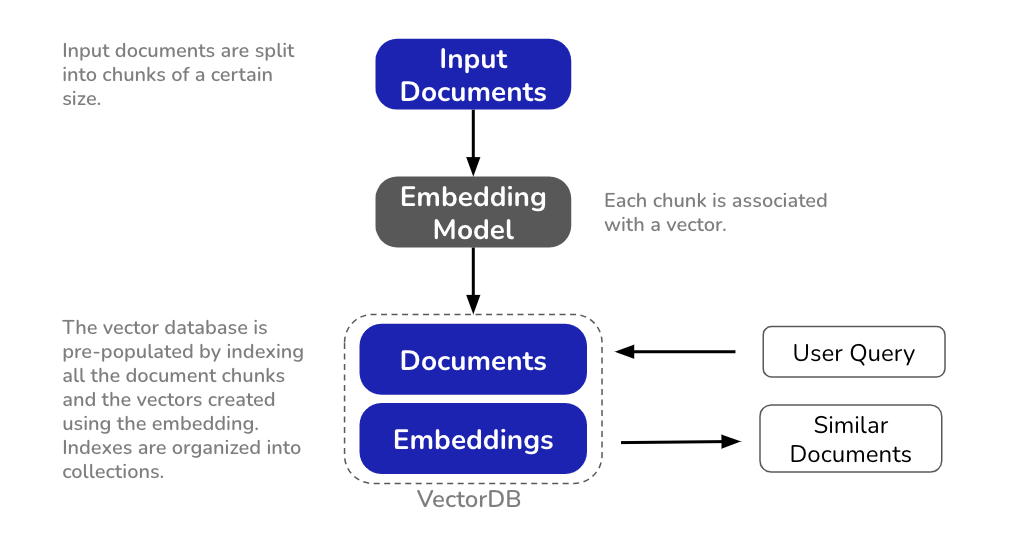

**Indexing**

In the first step, we ingest the different sources of data into a document database. At this stage, the focus is on assembling all the data (irrespective of format, e.g., text, pdf) relevant to the use case, and data exists in the raw unmodified form. However, given the context window limitations of LLMs, we cannot stuff all the documents in the database as context. Even if we did have an infinite context window, the LLM would find it difficult to provide a coherent answer while sifting through the noise for the signal. To avoid this situation, we will need to carefully select documents that relate to the user input so the LLM can be tasked to answer based only on the context.

While embeddings solve for retrieval of appropriate context given a query, a more efficient application of vectorization is to transform raw data into smaller chunks before feeding it to an embedding model. There are two important reasons why this is needed:

- Embedding models are themselves Transformer models and hence have input length constraints. Any text that is longer than the maximum input length allowed by the embedding model is usually truncated.
- Slicing the data into chunks facilitates fine-grained control of the specific information that can be injected as context. This helps the model focus only on the information most relevant to the query.

In [ ]:
report = 'Article_QnA'
vectorstore = Chroma.from_documents(
    document_chunks,
    embedding_model,
    collection_name=report
)

The given code initializes a **vector database** (also called **vector store**) using **Chroma**, a popular open-source vector database, to store **document embeddings** for retrieval in a **Retrieval-Augmented Generation (RAG)** system. Here's a breakdown of what each part does:  

- **`report = 'Article_QnA'`**  
   - This defines a **collection name** (`report`) as `"Article_QnA"`. The collection name helps organize and reference stored embeddings in Chroma.

- **`vectorstore = Chroma.from_documents(...)`**  
   - This creates a **Chroma vector store** from a set of **document chunks**. Chroma is used to store and retrieve embeddings efficiently.

- **Parameters Passed to `Chroma.from_documents()`**  
   - `document_chunks`: A list of **text chunks** (split portions of a document) that will be converted into embeddings.  
   - `embedding_model`: The model responsible for **embedding** the document chunks into vector representations. Common choices include OpenAI’s embeddings, Sentence Transformers, or other dense vector models.  
   - `collection_name=report`: The name of the collection in the Chroma database, which in this case is `"Article_QnA"`, allows retrieval within this specific dataset.

### Retrieval

The user input is converted to a vector representation using the same model that was used for the context chunks. Then a similarity search is executed against the vectorized chunks in the vector database. Top-$k$ chunks from the search results in this step are then stuffed into the prompt as the context and the LLM is instructed to answer the user query using only the context.

We will now create a retriever that can query an input text and retrieve the top$-k$ documents that are most relevant from the vector store.

- Under the hood, a similarity score is computed between the embedded query and all the chunks in the database
- The top $k$ chunks with the highest similarity scores are then returned.

In [ ]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 6}
)

The given code initializes a **retriever** from the **Chroma vector store** to fetch similar documents based on embeddings. Here's a breakdown:

- `vectorstore.as_retriever(...)`: Converts the **Chroma vector store** into a retriever for querying.
- `search_type='similarity'`: Specifies that retrieval is based on **cosine similarity** (or another similarity metric used by Chroma).
- `search_kwargs={'k': 6}`: Retrieves the **top 6 most similar** documents for a given query.

This allows for **efficient information retrieval**, where the retriever finds the most relevant document chunks based on their **semantic similarity** to a user's query.

#### **Retrieving the Relevant Documents**

Let's ask a simple query and see what document chunks are returned based on the similarity search.

In [ ]:
user_input = "what are LLMs? what are the types of LLMs?"

relevant_document_chunks = retriever.get_relevant_documents(user_input)

In [ ]:
len(relevant_document_chunks)

6

In [ ]:
for document in relevant_document_chunks:
    print(document.page_content.replace("\t", " "))

3 | P a g e  
are hosted on cloud platforms and can be used 
for various NLP tasks such as text generation, 
translation, summarization, and more. Some of 
the leading examples include OpenAI's GPT 
models, Google's PaLM (Path Language 
Model), Meta’s LLaMA, and NVIDIA's NeM o TM. 
These models have gained popularity due to 
their versatility and ease of integration into 
various applications. They have the advantage 
of being continuously updated and improved by 
the developers, which helps ensure they 
remain state -of-the-art in t erms of performance.  
The use of these models allows for their 
continuous training.  
b. Private LLMs  
Private LLMs are models that are customized 
or tuned for specific tasks or industries,  or 
organizations and are operated within a private 
cloud or an in -house infrastructure. These 
models could be either purpose -built from 
scratch or fine -tuned versions of publicly 
available models. The primary aim of these 
LLMs is to address specific busine

In [ ]:
len(relevant_document_chunks[0].page_content)

2016

It can be observed that the chunks are related to the user query and can perhaps contain the answer.

## **Generation**

In the **generation part** of **Retrieval-Augmented Generation (RAG)**, an **LLM (Large Language Model)** is needed because it effectively understands complex queries and generates **coherent, context-aware responses** in natural language. It seamlessly **integrates and synthesizes** the retrieved context with the user's query, ensuring accurate and relevant answers. LLMs handle **ambiguous or complex questions** by reasoning over the retrieved knowledge, generating **fluent and human-like text** for a better user experience.

### Downloading and loading the LLM

We are going to download and use the Llama model which is trained on 13 billion parameters. The size of this model is around 9GB so it is recommended to have a good internet connection along with a GPU to download it and generate responses from it respectively.

In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama    # This will throw an error if you've have installed the GPU version of llama_cpp and haven't enabled the GPU

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

The given code downloads a model file from **Hugging Face Hub** using the `hf_hub_download` function. Here's a breakdown:

- `hf_hub_download(...)`: Fetches a file from the **Hugging Face Model Hub**.
- `repo_id=model_name_or_path`: Specifies the **repository ID** (i.e., the model's name or path on Hugging Face).
- `filename=model_basename`: Specifies the **file name** to download from the model repository.

This is typically used to **download pre-trained models**, embeddings, or other necessary files from Hugging Face for tasks like **text generation, embeddings, or fine-tuning**.

In [ ]:
lcpp_llm = Llama(
    model_path=model_path,
    n_ctx=4096,  # Context window
    n_batch=1024,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
)

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


The given code initializes a **Llama model**for local inference. Here's a breakdown of each parameter:

- **`Llama(...)`**: Loads a **Llama model** for text generation.
- **`model_path=model_path`**: Specifies the **file path** of the downloaded model (from Hugging Face or another source).
- **`n_ctx=4096`**: Sets the **context window** (i.e., the maximum number of tokens the model can process at once).
- **`n_batch=1024`**: Defines the **batch size** for processing tokens. A higher value improves speed but requires more VRAM.
- **`n_gpu_layers=45`**: Determines how many **layers** are offloaded to the **GPU**. Adjust this based on available **VRAM**.

This setup is optimized for **running a local Llama model**, leveraging both **CPU and GPU** for efficient inference. The parameters should be adjusted based on **hardware constraints** (CPU, GPU, and RAM availability).

## **RAG**

### Prompt Design

Once the vector database is set up, embedding generated from the query text is compared with all the document embeddings in the vector database. The most similar documents are then retrieved and presented along with the original query in the prompt.

Finally, in the prompt, we instruct the LLM to focus only on the context to answer the user query. The key idea here is that both the query and the context are dynamically injected into the prompt.

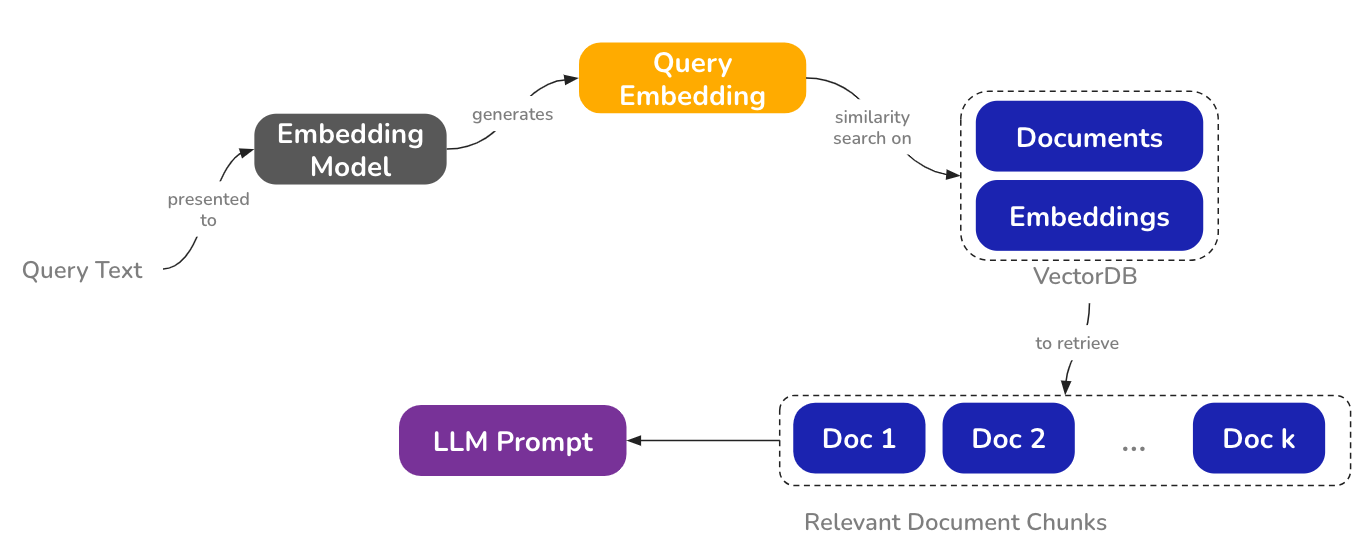

Prompt designing is a crucial part of designing a RAG based system, it consists mainly of two parts:

- system message: This is the instruction that has to be given to the LLM.
- user message template: This is a message template that contains the context retrieved from the document chunks and the User Query.

In [ ]:
qna_system_message = """
You are an assistant whose work is to give answers to questions with repect to a context.
User input will have the context required by you to answer user questions.

This context will begin with the token: ###Context.
The context contains references to specific portions of a document relevant to the user query.

User questions will begin with the token: ###Question.

Strictly answer only using the information provided in the ###Context.
Do not mention anything about the information in ###Context or the question in ###Question in your final answer.

If the answer to ###Question cannot be derived from the ###Context, just respond by saying "I don't know".

Remember that the answer to ###Question might not always be directly present in the information provided in the ###Context.
the answer can be indirectly derived from the information in ###Context.

"""

**Note**: It is important to specify that the LLM should not attempt to answer the question if the context provided (retrieved from the knowledge base provided) doesn't contain the information required. We don't want the LLM to use the knowledge from its training data and/or hallucinate to share a "seemingly correct" answer.

In [ ]:
qna_user_message_template = """
Conider the following ###Context and ###Question
###Context
{context}

###Question
{question}
"""

### Defining the RAG function for response




Let's define a function that will take a user query and LLM as an input, take the returned chunks as a context, and then use that context to generate an answer for the user query.

In [ ]:
def RAG(user_input , llm):
    """
    Args:
        user_input: Takes a user input for which the response should be retrieved from the vectorDB.
        llm: The LLM to be used for generating the response
    Returns:
        The generated response based on the user query and the context from the knowledge base
    """
    relevant_document_chunks = retriever.get_relevant_documents(user_input)
    context_list = [d.page_content.replace("\t", " ") for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)



    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""


    # Quering an LLM
    try:
        response = llm(
                prompt=prompt,
                max_tokens=500,
                temperature=0.4,
                top_p=0.95,
                repeat_penalty=1.2,
                top_k=25,
                stop=['INST'],
                echo=False
                )

        prediction =  response["choices"][0]["text"]

    except Exception as e:
        prediction = f'Sorry, I encountered the following error: \n {e}'

    return  prediction

Let's try this function on the previous user query and see whether it can generate an answer.

### Testing the RAG based system

In [ ]:
print(RAG("What are LLMs? What are the types of LLMs?" , lcpp_llm))

  Sure! I'd be happy to help answer your questions about LLMs.

Based on the context provided, LLMs refer to Large Language Models that are trained on vast amounts of text data to generate language outputs that are similar to the training data. There are several types of LLMs, including:

1. Public LLMs: These models are publicly available and can be accessed by anyone. Examples include OpenAI's GPT models and Google's PaLM.
2. Private LLMs: These models are customized or tuned for specific tasks or industries and are operated within a private cloud or in-house infrastructure. Examples include NVIDIA's NeM o TM and BloombergGPT.
3. Open Source LLMs: These models are made available to the public with their source code and parameters, allowing developers to modify, enhance, and adapt them for various purposes. Examples include Hugging Face and MosaicML.

Please let me know if you have any other questions or if there's anything else I can help with!


We can see that it can generate meaningful answers within the context that has been provided.

Lets try and ask some different queries

In [ ]:
print(RAG("What is the name of the open-source initiative under Bhashini that contributes to the accumulation of language-specific datasets?" , lcpp_llm))

Llama.generate: prefix-match hit


  Sure! I'm ready to answer your question. The context you provided contains information about Bhashini and its role in advancing AI development in India, specifically in collecting and curating language-specific datasets. Based on this context, the name of the open-source initiative under Bhashini that contributes to the accumulation of language-specific datasets is:

Bhasha Daan.


In [ ]:
print(RAG("Can you explain specific examples from the article where LLMs are developed for different use cases?" , lcpp_llm))

Llama.generate: prefix-match hit


  Sure! The text provides several instances of unique situations in which large language models (LLMs) have been created to address particular needs:
1. Private LLMs: Companies like NVIDIA create customized, fine-tuned versions of publicly available LLMs for specific tasks or industries. For instance, Bloomberg has developed a 50 billion parameter private large language model called BloombergGPT to better serve its customers in the finance sector.
2. Open source LLMs: Models are made accessible to the general public with their source code and parameters, allowing developers to modify, enhance, and adapt them for various purposes. For instance, Hugging Face and MosaicML offer platforms that facilitate fine-tuning and customization of open-source LLMs.
3. Customizability & Flexibility: Japan is creating LLMs based on localized datasets to address gaps in critical areas. For example, SoftBank is developing an LLM based on Japanese datasets that will serve as the basis for its generative A

In [ ]:
print(RAG("What is the range of parameter sizes being considered for small to medium sized LLMs in India?" , lcpp_llm))

Llama.generate: prefix-match hit


  Based on the context provided, the range of parameter sizes being considered for small to medium-sized LLMs in India is not directly mentioned. However, we can infer that smaller models with fewer parameters are more practical and feasible given the resource constraints and challenges faced by India.

The context mentions that developing large language models similar to GPT-4 (>trillion parameters) or even GPT-3.5 (175Bn parameters) demands significant GPU compute capacity, which is currently in high demand and short supply globally. Therefore, it may not be feasible for India to develop such large models initially.

Instead, the focus might be on building small to medium-sized LLMs with targeted expertise, ranging from a few billion parameters to perhaps tens of billions of parameters. These models could cater specifically to the nuances of the finance domain or other specific areas, as mentioned in the context.

Therefore, without further information, we cannot pinpoint an exact ra

We can see that this RAG based QnA System has no problem in giving answers which are directly present in the context. Lets try asking something which is not directly present in the document but It can be derived from the context

In [ ]:
print(RAG("What is the difference between the training time of Open AI's GPT-3.5 and Google's PALM model?", lcpp_llm))

Llama.generate: prefix-match hit


  Sure! I'll do my best to answer your question based on the information provided in the context.

The difference between the training time of OpenAI's GPT-3.5 and Google's PaLM model is not explicitly mentioned in the text. However, we can infer some information from the given details:

OpenAI's GPT-3.5 was trained on one trillion tokens using Amazon SageMaker for a total of ~7,000,000 GPU hours [14]. On the other hand, Google's PaLM model was trained on 3.5 trillion tokens with no information provided about the training time or hardware used [22].

Given that GPT-3.5 has a smaller number of parameters (40 billion) compared to PaLM (175 billion), it is likely that Google's PaLM model required more training time and resources than OpenAI's GPT-3.5, considering the scale difference between the two models. However, without explicit information on the training time of PaLM, we cannot make a definitive statement about the exact difference in training time between the two models.


In [ ]:
print(RAG("Compare the training parameters size for Meta's Llama model and NVIDIA's NeMo model", lcpp_llm))

Llama.generate: prefix-match hit


  Sure! Here is the comparison of the training parameters size for Meta's Llama model and NVIDIA's NeMo model:

Meta's Llama model:

* Parameters: 137 billion
* Training Data: 2918 A100 GPUs for 792 hours

NVIDIA's NeMo model:

* Parameters: 530 billion
* Training Data: Not disclosed

Based on the information provided, it appears that Meta's Llama model has a smaller number of parameters compared to NVIDIA's NeMo model. However, without knowing the specific training data and hardware used for each model, it is difficult to make a direct comparison of their performance or effectiveness.


It is able to derive the answer from the context. Let's try asking something which is completely out of context.

In [ ]:
print(RAG("What is the diameter of Earth?" , lcpp_llm))

Llama.generate: prefix-match hit


  I'm not able to answer your question as it is not present in the provided context. The context only mentions the size of LLMs, parameters, tokens, and the challenges of using them, but does not provide any information about the diameter of the Earth.


It is not able to generate the answer because the query is not relevant to the context.

# **Output Evaluation**

**Why Do We Need Output Evaluation in a RAG-Based System?**  
Output evaluation in a **Retrieval-Augmented Generation (RAG) system** is essential to ensure that the system produces **accurate, relevant, and reliable** responses. Since RAG systems rely on both **retrieval** and **generation**, issues like **irrelevant retrieval, hallucinations, or poor contextual grounding** can degrade the output quality. Evaluating the outputs helps in:  

- **Measuring Groundedness** – Ensuring that the generated response is **faithfully derived** from the retrieved documents.  
- **Assessing Relevance** – Checking if the retrieved information directly answers the user’s query.    


**Methods for Evaluating RAG Outputs:**  
1. **Groundedness Scoring and Relevance Evaluation** – Measures how much of the generated answer is **derived from the retrieved context** and Assesses how well the generated response **addresses the main aspects** of the question using the retrieved context. (e.g., using an LLM as a judge with a rating scale).  
2. **Exact Match & ROUGE Scores** – Compares the generated output with a **gold standard reference** for precision and recall.  
3. **BLEU Score** – Measures how similar the generated text is to a reference answer, often used in **machine translation** but applicable to RAG as well.  

By implementing these evaluation methods, a **RAG system** can be fine-tuned to generate more **accurate, contextually relevant, and trustworthy** responses.

For our RAG-based system, we are going to use the **LLM-as-a-Judge** method because other evaluation methods like BLEU and ROGUE score require human reference text as a gold standard reference which we don't have for this case.

LLM judge can determine whether the generated output accurately synthesizes information from the retrieved documents without introducing hallucinations or inconsistencies. It evaluates if the response is contextually relevant and answers the query effectively. Additionally, LLMs can check for logical coherence, ensuring that the generated text flows naturally and maintains consistency throughout.

This method offers several advantages, including scalability and consistency in evaluations, as the LLM can quickly assess large volumes of outputs using predefined criteria. It also reduces the need for human evaluators, enabling faster iteration and improvement of RAG systems. However, challenges include ensuring that the LLM judge itself is factually accurate and unbiased. To address this, LLMs are often fine-tuned or guided using specific evaluation prompts and rubrics to enhance their judgment capabilities.

Overall, using an LLM as a judge enhances the evaluation process in RAG systems by providing a scalable and consistent way to measure relevance, coherence, and factual accuracy.

- We are using the same Llama model for evaluation, so the LLM is rating itself on how well it has performed in the task.

the two variables, groundedness_rater_system_message, and relevance_rater_system_message, define the evaluation criteria for assessing the quality of the generated answers.

In [ ]:
groundedness_rater_system_message = """

You will be presented a ###Question, ###Context used by the AI system and AI generated ###Answer.

Your task is to judge the extent to which the ###Answer is derived from ###Context.

Rate it 1 - if The ###Answer is not derived from the ###Context at all
Rate it 2 - if The ###Answer is derived from the ###Context only to a limited extent
Rate it 3 - if The ###Answer is derived from ###Context to a good extent
Rate it 4 - if The ###Answer is derived from ###Context mostly
Rate it 5 - if The ###Answer is is derived from ###Context completely

Please note: Make sure you give a single overall rating in the range of 1 to 5 along with an overall explanation.

"""

This prompt is designed to evaluate the groundedness of the AI-generated answer, i.e., how well the answer is derived from the provided context. It asks the LLM judge to compare the answer with the context and rate it on a scale of 1 to 5, where:

1 indicates no derivation from the context, and
5 indicates complete derivation from the context.
This helps in assessing whether the model is hallucinating or if its response is factually accurate and grounded in the retrieved information.

In [ ]:
relevance_rater_system_message = """

You will be presented with a ###Question, the ###Context used by the AI system to generate a response, and the AI-generated ###Answer.

Your task is to judge the extent to which the ###Answer is relevant to the ###Question, considering whether it directly addresses the key aspects of the ###Question based on the provided ###Context.

Rate the relevance as follows:
- Rate 1 – The ###Answer is not relevant to the ###Question at all.
- Rate 2 – The ###Answer is only slightly relevant to the **###Question**, missing key aspects.
- Rate 3 – The ###Answer is moderately relevant, addressing some parts of the **###Question** but leaving out important details.
- Rate 4 – The ###Answer is mostly relevant, covering key aspects but with minor gaps.
- Rate 5 – The ###Answer is fully relevant, directly answering all important aspects of the **###Question** with appropriate details from the **###Context**.

Note: Provide a single overall rating in the range of 1 to 5, along with a brief explanation of why you assigned that score.
"""

This prompt is focused on evaluating the relevance of the generated answer. It checks if the answer addresses the main aspects of the question using the provided context. The rating is again on a scale of 1 to 5, where:

- 1 indicates the answer is irrelevant, and
- 5 indicates it is completely relevant to the question.

This ensures that the output is not only accurate but also contextually appropriate and directly answers the user's query.

In [ ]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

Let's try out a sample answer and check its groundedness and relevance score.

In [ ]:
user_input = "Compare the training parameters size for Meta's Llama model and NVIDIA's NeMo model"

In [ ]:
answer = RAG(user_input, lcpp_llm)

In [ ]:
print(answer)

  Sure! Here is the comparison of the training parameters sizes for Meta's Llama model and NVIDIA's NeMo model based on the information provided in the context:

Meta's Llama model:

* Number of parameters: 175 billion (according to [2])
* Training time: 792 hours (according to [2])

NVIDIA's NeMo model:

* Number of parameters: 530 billion (according to [4])
* Training time: 1200 hours (according to [4])

Based on the information provided, it appears that Meta's Llama model has a smaller number of training parameters than NVIDIA's NeMo model. However, I cannot determine which model is better or more effective without additional context.


At first sight, the answer seems to be quite specific and informative. The LLM seems to have given the correct answer based on the provided context. This means that upon evaluation, this answer would get a high score on groundedness and relevance.

In [ ]:
def generate_ground_relevance_response(user_input,answer,llm):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)


    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=500,
            temperature= 0,
            top_p= 0.95,
            repeat_penalty= 1.2,
            top_k= 50,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens= 500,
            temperature= 0.4,
            top_p= 0.95,
            repeat_penalty= 1.2,
            top_k= 50,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

In [ ]:
groundedness_report, relevance_report = generate_ground_relevance_response(user_input,answer,lcpp_llm)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
print(groundedness_report, '\n\n', relevance_report)

  Based on the given information, I would rate the answer as follows:

* The answer fully addresses all aspects of the question and provides a clear comparison between Meta's Llama model and NVIDIA's NeMo model based on their training parameters sizes. (5 out of 5)

Therefore, the overall rating is 5 out of 5. 

   Rating: 4 (Fully relevant)

The provided answer provides a direct comparison of the training parameters sizes for Meta's Llama model and NVIDIA's NeMo model, based on the information given in the context. The answer is concise and directly addresses the question asked, providing all necessary details from the given context. Therefore, I rate this answer as fully relevant.


As expected, the answer does get a high score of 5 in groundedness and 4 in relevance.
Let's see what happens when we give the LLM to judge a completely out-of-context answer.

In [ ]:
user_input_2 = 'What is the diameter of Earth?'
answer2 = RAG(user_input_2, lcpp_llm)

Llama.generate: prefix-match hit


In [ ]:
print(answer2)

  I don't know. The context does not provide information about the diameter of Earth.


- Since the knowledge base doesn't contain any information regarding the topic in the question asked, the LLM's response doesn't contain the information required as we strictly asked it not to answer such questions.

In [ ]:
groundedness_report_2, relevance_report_2 = generate_ground_relevance_response(user_input_2,answer2,lcpp_llm)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
print(groundedness_report_2, '\n\n', relevance_report_2)

  Rating: 1 (Not derived at all)

The answer provided is "I don't know," which indicates that the response was not derived from the context. The question asked for the diameter of Earth, but the answer did not provide any information related to that topic. Therefore, the rating is 1 (Not derived at all). 

   Rating: 1 - Not Relevant at All

The answer provided is a non-sequitur and does not address the question about the diameter of Earth. The response is completely unrelated to the topic and lacks any relevant information or explanation.


- Since the response doesn't contain any information from the knowledge base provided (the knowledge base itself doesn't have any information on the topic), the response generated by the LLM has been given a low groundedness score.
- Since the LLM was unable to answer the question asked with the right information, it's been given a low relevance score.

# **Q&A without Context**

Firstly we will try to generate a response directly from an LLM without giving any context and then compare it with the output from RAG based System to see how it is different.

In [ ]:
query = 'Can you explain specific examples from the article where LLMs are developed for different use cases'

In [ ]:
response = lcpp_llm(
        prompt=query,
        max_tokens=500,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
        )

print(response["choices"][0]["text"])

?

Sure, here are some specific examples of LLMs being developed for different use cases:

1. Legal Research and Analysis: LLMs can be trained on large legal databases to assist with legal research and analysis tasks such as case law summarization, contract review, and regulatory compliance monitoring. For example, the legal AI platform LawGeex uses an LLM to analyze legal documents and provide insights on their meaning and implications.
2. Document Review: LLMs can be used to automate document review tasks such as due diligence, contract review, and e-discovery. For example, the legal tech company Logikcull uses an LLM to help law firms and corporate legal teams review documents more efficiently and accurately.
3. Contract Drafting: LLMs can be used to generate customized contract templates based on specific terms and conditions. For example, the AI-powered contract drafting platform LawDroid uses an LLM to generate contracts for a variety of industries such as real estate, employment

Lets now see the output from the RAG based system

In [ ]:
print(RAG("Can you explain specific examples from the article where LLMs are developed for different use cases" , lcpp_llm))

Llama.generate: prefix-match hit


  Sure! The text provides several instances of unique situations in which large language models (LLMs) have been created to address particular needs:
1. Private LLMs: Companies like NVIDIA create customized, fine-tuned versions of publicly available LLMs for specific tasks or industries. For instance, Bloomberg has developed a 50 billion parameter private large language model called BloombergGPT to better serve its customers in the finance sector.
2. Open source LLMs: Models are made accessible to the general public with their source code and parameters, allowing developers to modify, enhance, and adapt them for various purposes. For instance, Hugging Face and MosaicML offer platforms that facilitate fine-tuning and customization of open-source LLMs.
3. Customizability & Flexibility: Japan is creating LLMs based on localized datasets to address gaps in critical areas. For example, SoftBank is developing an LLM based on Japanese datasets that will serve as the basis for its generative A

* The RAG-based output is superior to the generic LLM output because it provides a more context-aware and strategically relevant response. While the generic output lists common applications of LLMs in the legal domain, it lacks specificity and mainly presents a laundry list of use cases without much depth or insight.

* In contrast, the RAG output offers a more tailored and innovative perspective, discussing unique scenarios such as Private LLMs, Open Source LLMs, and Sovereign LLMs, with relevant examples like BloombergGPT and SoftBank's localized Japanese LLM.

* This makes the RAG output more credible and informative, as it connects specific examples to broader industry trends and motivations, such as the need for customizability, data sovereignty, and strategic localization.

* Additionally, the RAG output is more coherent and contextually connected, organizing information into meaningful categories that enhance the clarity and narrative flow. This results in a more engaging and valuable answer, providing deeper insights into the evolving landscape of LLM applications compared to the more informational and generic approach of the LLM output.


# **Conclusion**

- We've learned how to create a Retrieval-Augmented Generation (RAG) based application that can perform Q&A from documents for accurate information retrieval.
    - First, we chunked the data to create multiple splits with overlaps.
    - Then we used embedding models to encode the different data splits.
    - Then we stored these embeddings in a vector database.
    - Then we defined an LLM that would take the user query and relevant context via the encoded data chunks.
    - Finally, we assembled all these components to build the RAG-based system.
- We've also learned how to evaluate the output of a RAG-based system using the LLM-as-a-Judge technique to check the groundedness and relevance of the generated output.
- Lastly, we also compared the output from an LLM and that from an RAG-based system and understood the differences in the groundedness and relevance of the two outputs.

<font size = 6 color = 'blue' > Power Ahead </font>
___